In [1]:
# load libraries
using HDF5
using LaTeXStrings
using PyPlot
using DelimitedFiles

In [2]:
# the function lists all h5 files in a directory
function list_h5_files(foldername::String; prefix::String="data_")
    path     = abspath(foldername)
    allfiles = readdir(path)

    Ns = length(prefix)

    its_names = Tuple[]
    # append only the files whose names start with the given prefix
    for file in allfiles
        try
            if (file[1:Ns] == prefix && file[end-2:end] == ".h5")
                # extract iteration
                it_str = file[Ns+1:end-3]
                fullname = joinpath(path, file)
                # add to list of tuples with iteration and name
                push!(its_names, (parse(Int64, it_str), fullname))
            end
        catch ex
            if isa(ex, BoundsError)
                # probably triggered by string comparison; do nothing
            else
                throw(ex)
            end
        end
    end

    # sort according to iteration
    sort!(its_names)
    # and extract the list of filenames and iterations
    filenames = [name for (it, name) in its_names]
    its       = [it for (it, name) in its_names]

    (its, filenames)
end

list_h5_files (generic function with 1 method)

In [10]:
# give the directory where the data from all the runs are saved
your_dir = "/home/thanasis/repos/my_chaos/presentations/nr_lectures_nottingham_group/lec4/numerics/examples/runs_center/SH_smooth"

"/home/thanasis/repos/my_chaos/presentations/nr_lectures_nottingham_group/lec4/numerics/examples/runs_center/SH_smooth"

In [31]:
# SH model
data_dir_SH = your_dir

#N=3 the times we doubled from Nx=17 to get this resolution
Nx = 128 # the overal course graining
n = 0

# load the ρ grid
xc = h5read(data_dir_SH*"/data_$((Nx)*2^n)/x.h5","x")
dxc = xc[2] - xc[1]
xm = h5read(data_dir_SH*"/data_$((Nx)*2^(n+1))/x.h5","x")
xf = h5read(data_dir_SH*"/data_$((Nx)*2^(n+2))/x.h5","x")

# list all available iterations (and corresponding files)
(its_c, all_filenames_c) = list_h5_files(data_dir_SH*"/data_$((Nx)*2^n)", prefix="data_")
(its_m, all_filenames_m) = list_h5_files(data_dir_SH*"/data_$((Nx)*2^(n+1))", prefix="data_")
(its_f, all_filenames_f) = list_h5_files(data_dir_SH*"/data_$((Nx)*2^(n+2))", prefix="data_")

# lists used in checking if the projection on the coarse grid is done correctly
#ρm_c = zeros(length(ρc));
@assert xc ≈ xm[1:2:end]
@assert xc ≈ xf[1:4:end]


In [32]:
#choose the commmon timestep to do the comparison.
#remember that its_c =its_m[1:2:end] = its_c[1:4:end]
#it_c is the timestep of the coarse resolution    
i = 120
it_c = its_c[i]#[1+i]#[i] for when they are saved on common timesteps
it_m = its_m[i]#[1+2*i]#[i]
it_f = its_f[i]#[1+2*2*i]#[i]
it_str_c  = lpad(it_c, 4, "0")
it_str_m  = lpad(it_m, 4, "0")
it_str_f  = lpad(it_f, 4, "0")

ϕc  =  h5read(data_dir_SH*"/data_$((Nx)*2^n)/data_$(it_str_c).h5","ϕ")
ψc  =  h5read(data_dir_SH*"/data_$((Nx)*2^n)/data_$(it_str_c).h5","ψ")
tc  =  h5readattr(data_dir_SH*"/data_$((Nx)*2^n)/data_$(it_str_c).h5", "./")["time"]

ϕm   =  h5read(data_dir_SH*"/data_$((Nx)*2^(n+1))/data_$(it_str_m).h5","ϕ")
ψm   =  h5read(data_dir_SH*"/data_$((Nx)*2^(n+1))/data_$(it_str_m).h5","ψ")
tm   =  h5readattr(data_dir_SH*"/data_$((Nx)*2^(n+1))/data_$(it_str_m).h5", "./")["time"]

ϕf   =  h5read(data_dir_SH*"/data_$((Nx)*2^(n+2))/data_$(it_str_f).h5","ϕ")
ψf   =  h5read(data_dir_SH*"/data_$((Nx)*2^(n+2))/data_$(it_str_f).h5","ψ")
tf   =  h5readattr(data_dir_SH*"/data_$((Nx)*2^(n+2))/data_$(it_str_f).h5", "./")["time"]

# make sure we're comparing the same timestep
@assert tc ≈ tm
@assert tc ≈ tf

1.859375

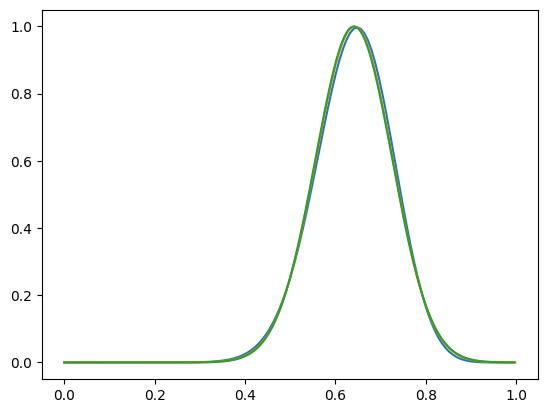

In [33]:
# plot grid function ϕ in different resolutions for the same timestep
plot(xc, ϕc)
plot(xm, ϕm)
plot(xf, ϕf)
print(tc)

1.859375

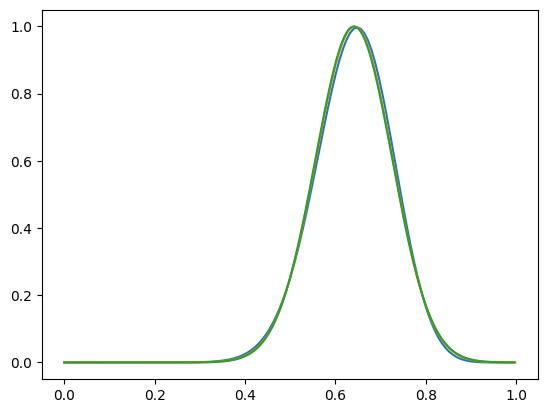

In [34]:
# plot grid function ψ in different resolutions for the same timestep
plot(xc, ψc)
plot(xm, ψm)
plot(xf, ψf)
print(tc)

1.859375

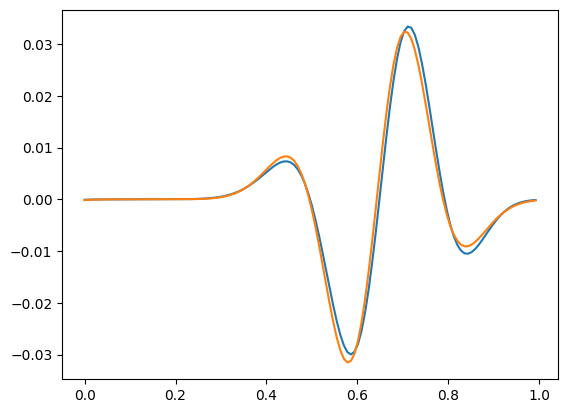

In [35]:
# take the difference of the gridfunction ϕ, on the common grid points, for the 3 resolutions
# plot this difference. If the rescaling factor for which the two difference overlap is 4,
# then we see 2nd order pointwise convergence. This number is given by the construction of the tests
# and the finite difference operators chosen.
ϕcm = ϕc - ϕm[1:2:end]
ϕmf = ϕm[1:2:end] - ϕf[1:4:end]

plot(xc, ϕcm)
plot(xc, 4*ϕmf)
print(tc)

1.859375

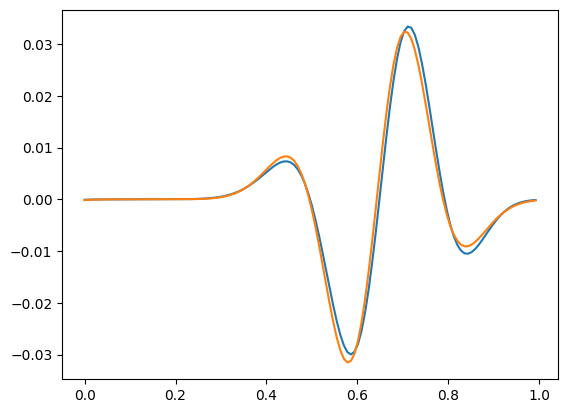

In [36]:
ψcm = ψc - ψm[1:2:end]
ψmf = ψm[1:2:end] - ψf[1:4:end]

plot(xc, ψcm)
plot(xc, 4*ψmf)
print(tc)